In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from pathlib import Path
import json
from dictor import dictor
from pprint import pprint

# specify the folder path
folder_path = Path('local_replay_jsons/')

# get a list of all files in the folder
file_list = folder_path.glob('*.json')

# sort the list based on last modified time
file_list = sorted(file_list, key=lambda x: x.stat().st_mtime)

# print the list of files in order of last modified time
for file in file_list:
    print(file.name)

file_to_view = file_list[-1]
print(f'\nWill be viewing:\n\t{file_to_view}')

with open(file_to_view, 'r') as f:
    full_replay = json.load(f)

replay.json
replay (1).json
replay_1.json
replay_2.json
replay_3.json
replay_4.json
replay_5.json
replay_6.json
replay_7.json
replay_8.json
replay_9.json

Will be viewing:
	local_replay_jsons\replay_9.json


In [19]:
full_replay.keys()

dict_keys(['observations', 'actions', 'metadata', 'default_seed'])

In [20]:
seed = dictor(full_replay, 'default_seed')
my_team = 'player_0'
print(f'seed = {seed}\nmy team = {my_team}')

seed = 44
my team = player_0


In [21]:
import logging
from agent import Agent
from util import show_env, MyReplayEnv
from config import update_logging_level

In [22]:
myenv = MyReplayEnv(seed=seed, Agent=Agent, replay_json=full_replay)


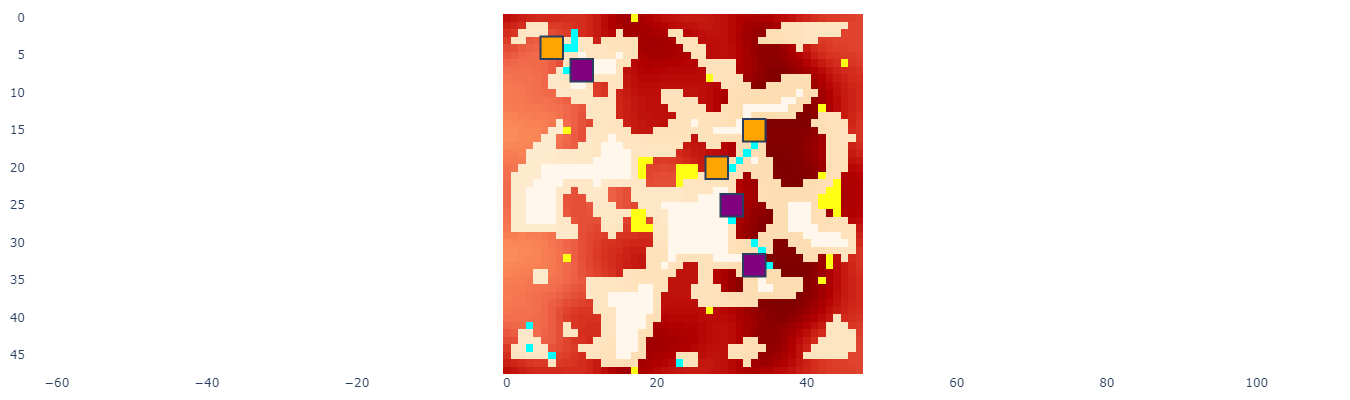

In [23]:
myenv.run_early_setup()
myenv.show()

  0%|          | 0/14 [00:00<?, ?it/s]

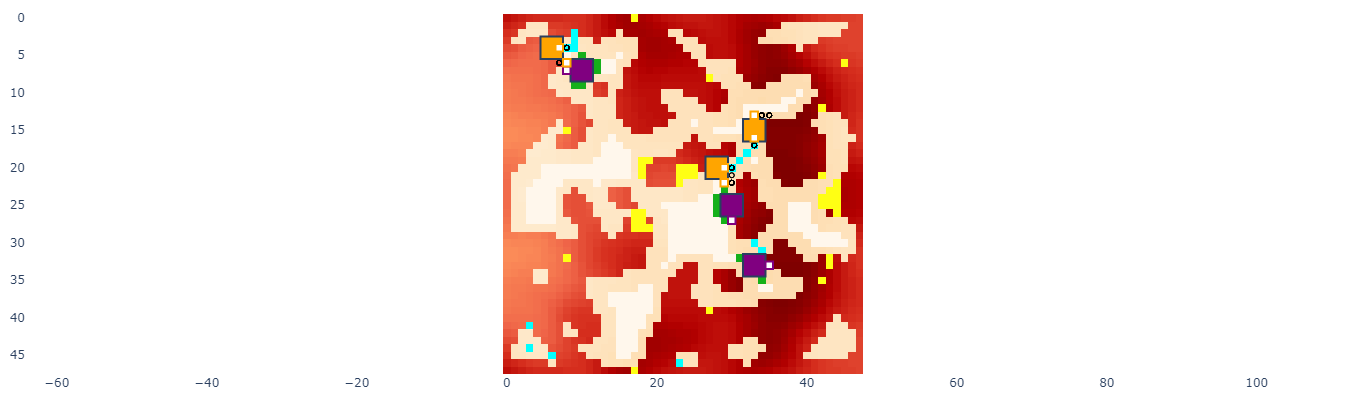

In [68]:
myenv.run_to_step(22)
myenv.show()

## Run one step at a time

In [69]:
import pandas as pd
from unit_action_planner import UnitActionPlanner
from mining_planner import MiningRoutePlanner
import copy

Showing beginning of Real Step: 17


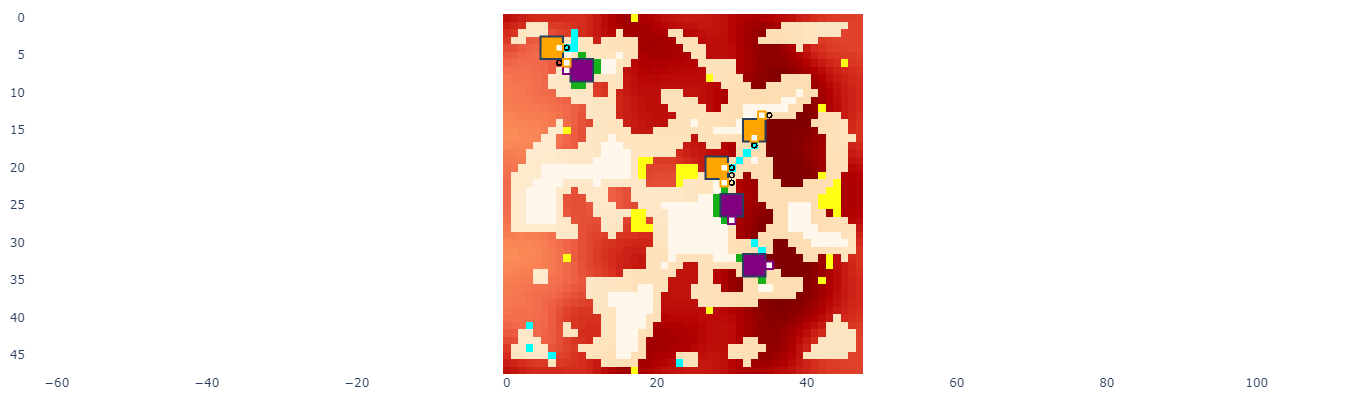

In [81]:
update_logging_level(logging.DEBUG)
myenv.undo()
myenv.step()
print(f'Showing beginning of Real Step: {myenv.real_env_steps + 1}')
myenv.show()

In [82]:
agent = myenv.agent
unit = myenv.agent.master.units.friendly.all['unit_8']
unit.action_queue

[]

In [74]:
myenv.undo()
myenv.agent._beginning_of_step_update(myenv.env_step, myenv.obs[myenv.agent.player], 1)

In [75]:
agent = myenv.agent
unit = myenv.agent.master.units.friendly.all['unit_8']
unit.action_queue

[array([ 3,  0,  0,  0,  0, 10]),
 array([0, 2, 0, 0, 0, 1]),
 array([   1,    0,    0, 1000,    0,    1]),
 array([  2,   0,   4, 777,   0,   1]),
 array([0, 4, 0, 0, 0, 1]),
 array([ 3,  0,  0,  0,  0, 13]),
 array([0, 2, 0, 0, 0, 1]),
 array([   1,    0,    0, 1000,    0,    1])]

In [76]:

# util.show_map_array(myenv.agent.master.pathfinder.full_costmap).update_layout(height=400, width=500).show()

In [77]:
factory_desires = agent.factory_action_planner.get_factory_desires()
factory_infos = agent.factory_action_planner.get_factory_infos()
mining_planner = agent.mining_planner
rubble_clearing_planner = agent.rubble_clearing_planner
tp = UnitActionPlanner(agent.master, factory_desires, factory_infos)


In [78]:
units_to_act = tp._get_units_to_act(tp.master.units.friendly.all)


UnitsToAct(needs_to_act={'unit_8': <unit_manager.FriendlyUnitManger object at 0x000001D0C9BB8C70>}, should_not_act={'unit_6': <unit_manager.FriendlyUnitManger object at 0x000001D0C9BC3280>, 'unit_7': <unit_manager.FriendlyUnitManger object at 0x000001D0C9BBD9A0>}, has_updated_actions={})

In [59]:
factory = agent.master.factories.friendly['factory_4']
rec = mining_planner.recommend(unit, util.ICE, True)

In [65]:
print(unit.start_of_turn_pos)
unit.pos = unit.start_of_turn_pos
unit.action_queue = []
p = MiningRoutePlanner(pathfinder, agent.master.maps.rubble, rec.resource_pos, rec.resource_type, factory, unit)

[10  7]


In [67]:
util.path_to_factory_edge_nearest_pos(pathfinder, factory.factory_loc, unit.pos, rec.resource_pos)

array([[10,  7],
       [ 9,  7]])

In [62]:
util.move_to_new_spot_on_factory(pathfinder, unit, factory)

True

In [64]:
unit.pos

array([10,  6])

In [55]:
print(unit.pos)
unit.action_queue = []
p.make_route(True)
print(unit.action_queue)
print(unit.pos)

[9 7]
[array([0, 1, 0, 0, 0, 1]), array([0, 3, 0, 0, 0, 1]), array([  2,   0,   4, 552,   0,   1]), array([0, 4, 0, 0, 0, 1]), array([ 3,  0,  0,  0,  0, 15]), array([0, 2, 0, 0, 0, 1]), array([   1,    0,    0, 1000,    0,    1])]
[9 7]


In [29]:
import numpy as np
import util

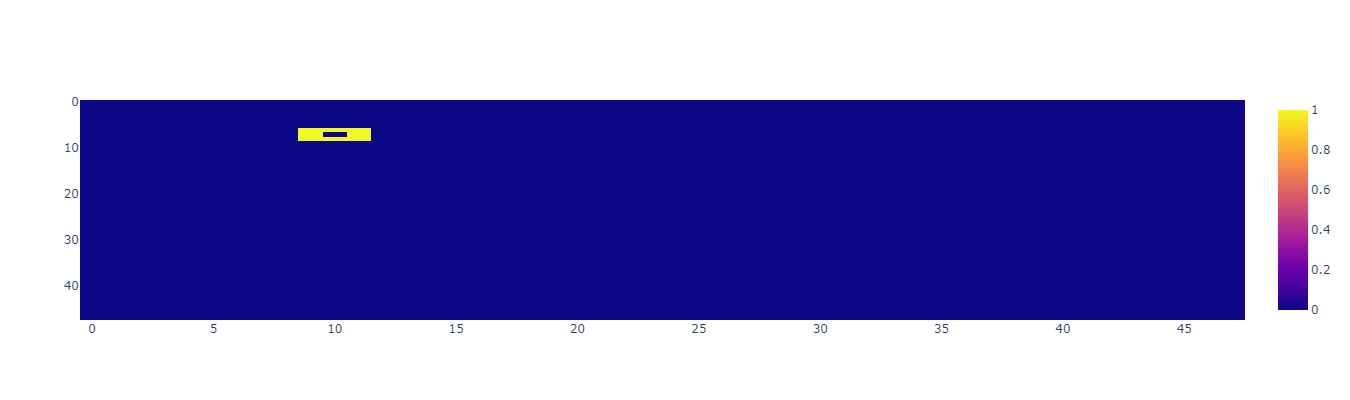

(9, 7)


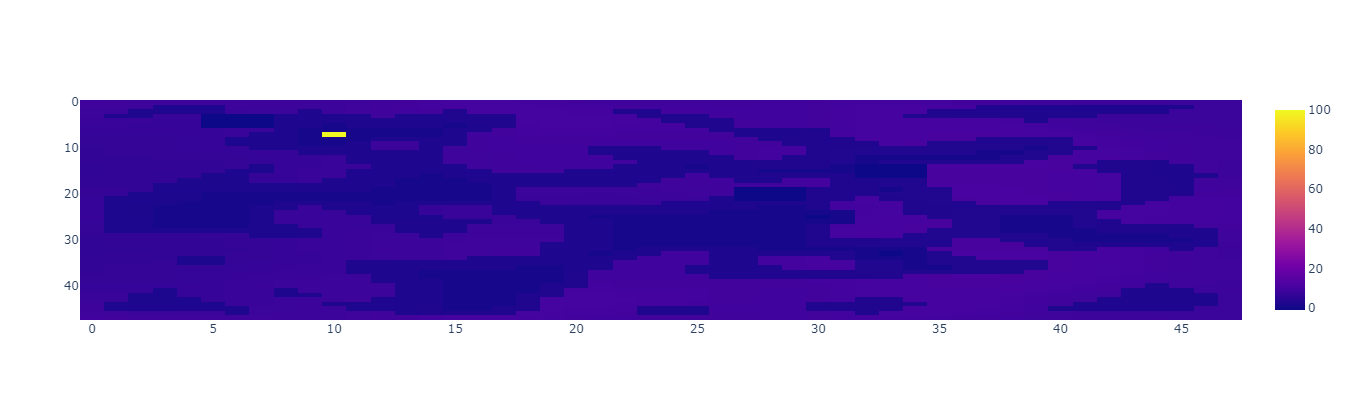

array([[10,  7],
       [ 9,  7]])

In [16]:
def set_middle_of_factory_loc_zero(factory_loc: np.ndarray):
    """Returns an array where the usual factory_loc that contains a 3x3 block of ones is replaced with a zero in the middle"""
    arr = factory_loc.copy()
    # Find the indices of non-zero elements
    indices = np.argwhere(arr == 1)

    # Calculate the center of the 3x3 block
    center = indices.mean(axis=0).astype(int)

    # Set the middle element of the 3x3 block to zero
    arr[tuple(center)] = 0
    return arr

fac = myenv.agent.master.factories.friendly["factory_4"]
# util.show_map_array(fac.factory_loc)
loc = set_middle_of_factory_loc_zero(fac.factory_loc)
util.show_map_array(loc).update_layout(height=400, width=500).show()
c = (8,7)
print(util.nearest_non_zero(loc, c))
util.show_map_array(myenv.agent.master.pathfinder.full_costmap).update_layout(height=400, width=500).show()
myenv.agent.master.pathfinder.fast_path((10,7), (9,7))

In [16]:
from mining_planner import MiningRoutePlanner

In [ ]:
rp = MiningRoutePlanner(

In [15]:
unit = myenv.agent.master.units.friendly.all['unit_21']
print(unit.actions_to_path(max_len=100))
print(unit.power_cost_of_actions(myenv.agent.master.maps.rubble))

[[44 13]
 [44 14]
 [44 15]
 [44 16]
 [44 17]
 [44 17]
 [44 17]
 [44 16]
 [44 15]
 [44 14]
 [44 13]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 12]
 [44 13]
 [44 14]
 [44 15]
 [44 16]
 [44 17]
 [44 17]]
48
